In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import skvideo.io
from tqdm import tqdm
%matplotlib inline

In [34]:
# constants
DATA_PATH = '/kaggle/dev/speed-challenge-2017-data/data'
DRIVE_VIDEO = os.path.join(DATA_PATH, 'drive.mp4')
CLEAN_DATA_PATH = '/kaggle/dev/speed-challenge-2017-data/clean_data'
CLEAN_IMGS_TRAIN = os.path.join(CLEAN_DATA_PATH, 'train2_imgs')

train_frames = 8616

## Dataset construction

In [30]:
train_y = pd.read_json(os.path.join(DATA_PATH, 'drive.json'), orient='records')
train_y = list(train_y[1])
assert(len(train_y)==train_frames)

In [31]:
def dataset_constructor(video_loc, img_folder, tot_frames, dataset_type):
    meta_dict = {}

    tqdm.write('reading in video file...')
    tot_frames = train_frames
    cap = skvideo.io.vread(video_loc)
     
    tqdm.write('constructing dataset...')
    for idx, frame in enumerate(tqdm(cap)):    
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_type == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        #skvideo.io.vwrite(img_path, frame)
    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    tqdm.write('writing meta to csv')
    meta_df.to_csv(os.path.join(CLEAN_DATA_PATH, dataset_type+'2_meta.csv'), index=False)
    
    return "done dataset_constructor"

In [32]:
# train data
dataset_constructor(DRIVE_VIDEO, CLEAN_IMGS_TRAIN, train_frames, 'train')

reading in video file...


100%|██████████| 8616/8616 [00:00<00:00, 449004.45it/s]

constructing dataset...
writing meta to csv


'done dataset_constructor'

## Dataset verification

### train 

In [36]:
train_meta = pd.read_csv(os.path.join(CLEAN_DATA_PATH, 'train2_meta.csv'))
assert(train_meta.shape[0] == train_frames)
assert(train_meta.shape[1] == 3)

In [37]:
train_meta.head()

image_path  image_index     speed
0  /kaggle/dev/speed-challenge-2017-data/clean_da...            0  2.022715
1  /kaggle/dev/speed-challenge-2017-data/clean_da...            1  2.040872
2  /kaggle/dev/speed-challenge-2017-data/clean_da...            2  2.062394
3  /kaggle/dev/speed-challenge-2017-data/clean_da...            3  2.076283
4  /kaggle/dev/speed-challenge-2017-data/clean_da...            4  2.077074

speed: 2.02271467184
shape: (480, 640, 3)


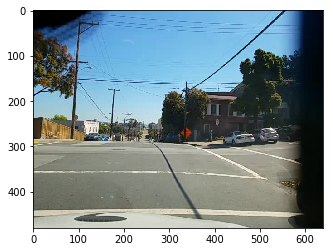

speed: 2.04087187591
shape: (480, 640, 3)


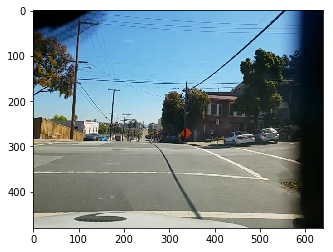

speed: 2.06239438105
shape: (480, 640, 3)


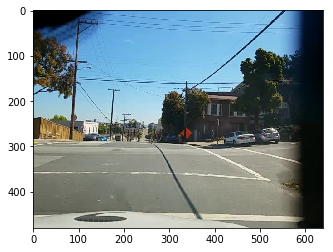

speed: 2.07628327499
shape: (480, 640, 3)


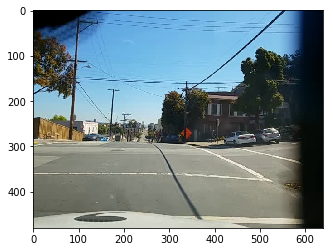

speed: 2.07707438119
shape: (480, 640, 3)


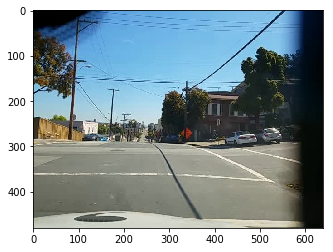

speed: 2.07086980717
shape: (480, 640, 3)


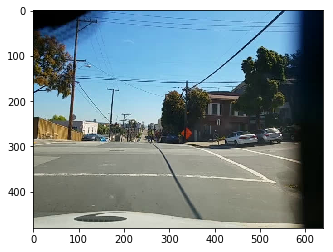

speed: 2.10757199447
shape: (480, 640, 3)


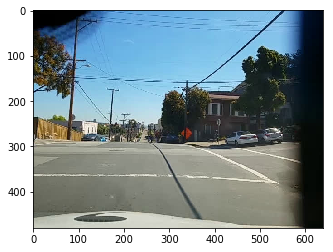

speed: 2.12232438513
shape: (480, 640, 3)


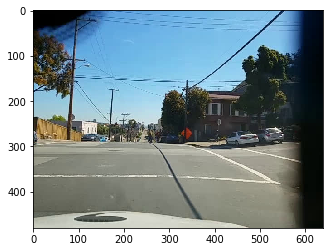

speed: 2.12757573259
shape: (480, 640, 3)


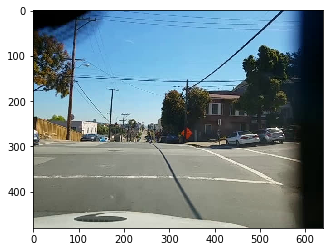

speed: 2.12333924894
shape: (480, 640, 3)


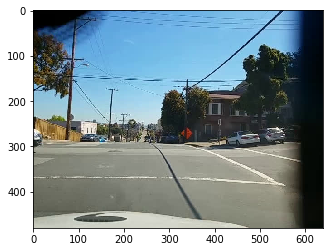

speed: 2.13336861019
shape: (480, 640, 3)


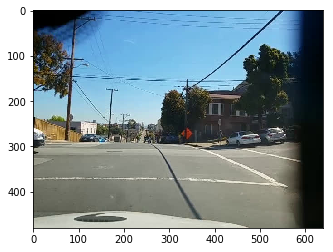

speed: 2.13951479238
shape: (480, 640, 3)


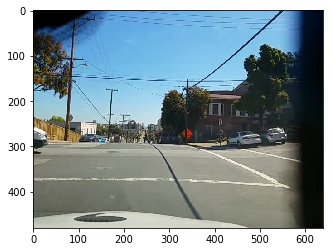

speed: 2.13038791656
shape: (480, 640, 3)


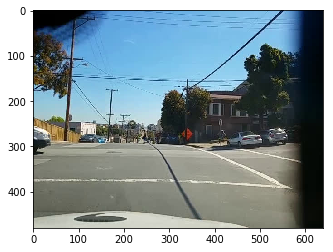

speed: 2.13288963828
shape: (480, 640, 3)


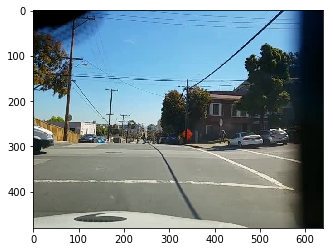

speed: 2.13791849309
shape: (480, 640, 3)


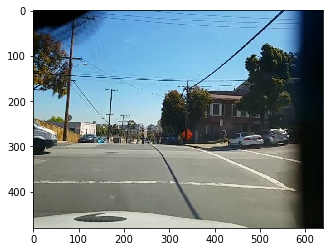

speed: 2.10316826033
shape: (480, 640, 3)


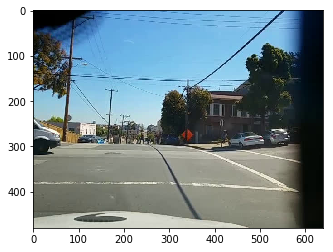

speed: 2.07790470381
shape: (480, 640, 3)


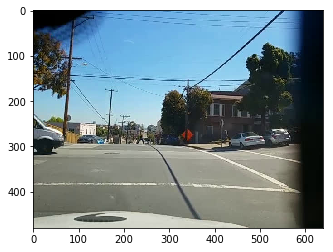

speed: 2.06931743782
shape: (480, 640, 3)


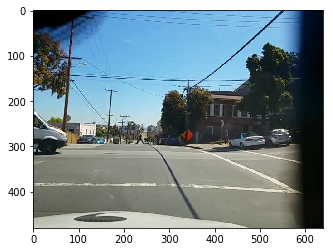

speed: 2.05582869102
shape: (480, 640, 3)


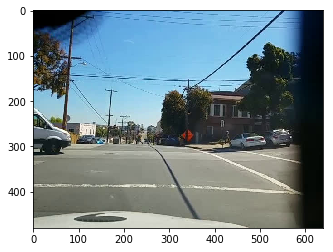

speed: 2.03764121952
shape: (480, 640, 3)


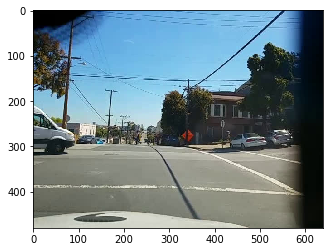

speed: 2.01258439398
shape: (480, 640, 3)


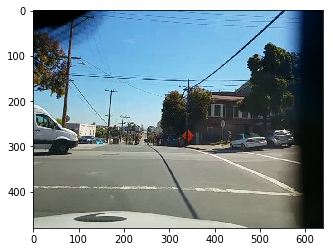

speed: 1.94524169443
shape: (480, 640, 3)


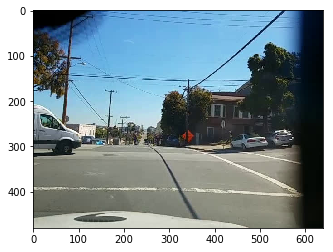

speed: 1.93135148531
shape: (480, 640, 3)


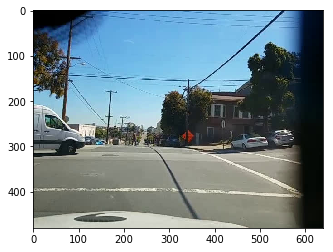

speed: 1.90842828832
shape: (480, 640, 3)


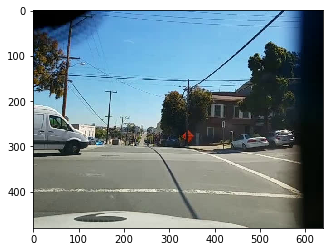

speed: 1.87003238745
shape: (480, 640, 3)


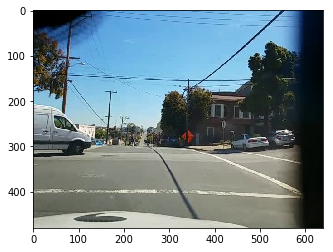

speed: 1.81596137168
shape: (480, 640, 3)


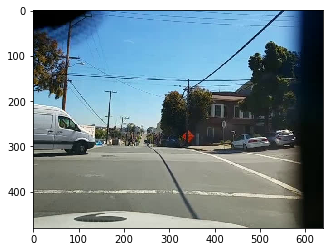

speed: 1.77254622359
shape: (480, 640, 3)


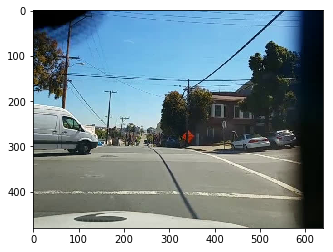

speed: 1.75086890327
shape: (480, 640, 3)


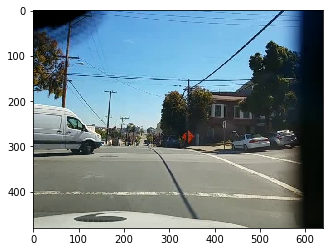

speed: 1.731944794
shape: (480, 640, 3)


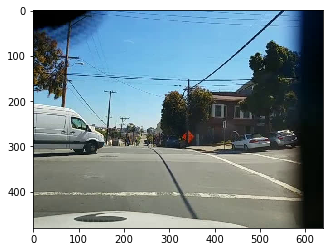

speed: 1.6750174704
shape: (480, 640, 3)


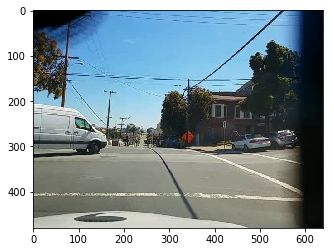

speed: 1.65570095921
shape: (480, 640, 3)


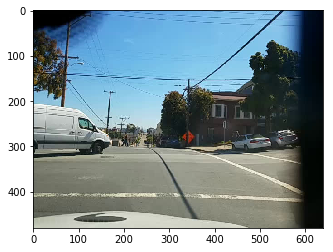

speed: 1.62290008471
shape: (480, 640, 3)


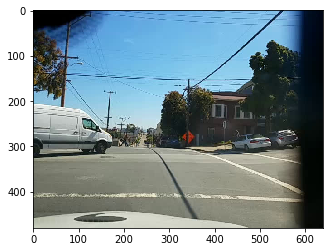

speed: 1.56128696752
shape: (480, 640, 3)


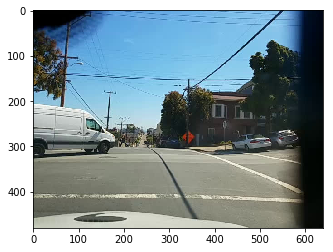

speed: 1.55094345933
shape: (480, 640, 3)


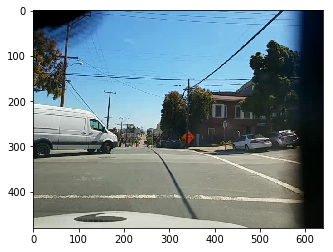

speed: 1.52875258811
shape: (480, 640, 3)


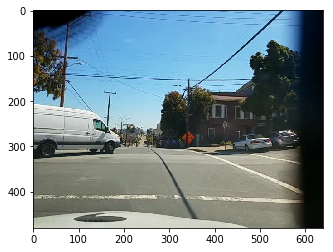

speed: 1.49661743198
shape: (480, 640, 3)


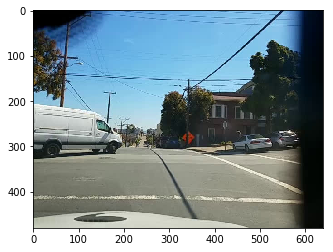

speed: 1.38436801212
shape: (480, 640, 3)


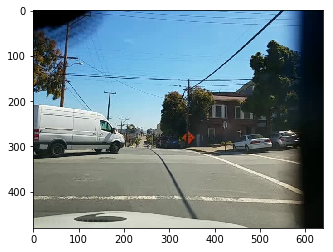

speed: 0.325646468975
shape: (480, 640, 3)


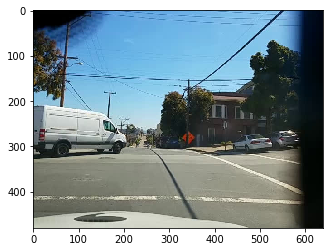

speed: 0.325621188645
shape: (480, 640, 3)


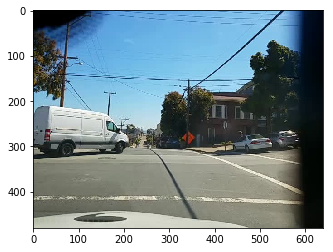

speed: 0.279052201999
shape: (480, 640, 3)


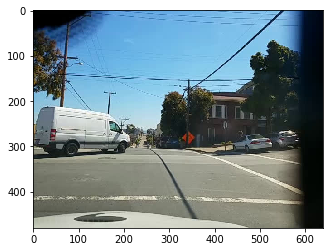

speed: 0.0
shape: (480, 640, 3)


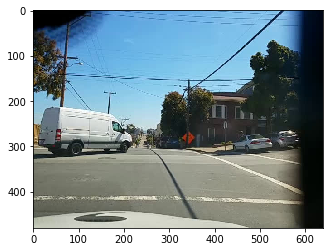

speed: 0.0
shape: (480, 640, 3)


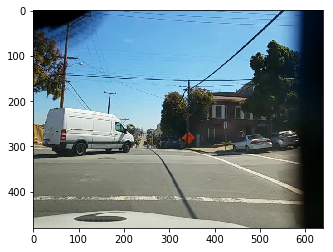

speed: 0.0
shape: (480, 640, 3)


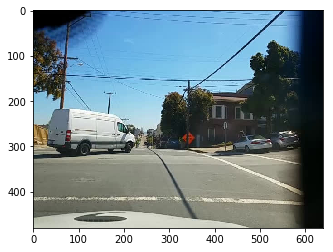

speed: 0.0
shape: (480, 640, 3)


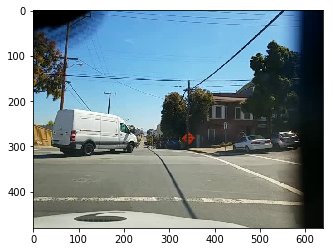

speed: 0.0
shape: (480, 640, 3)


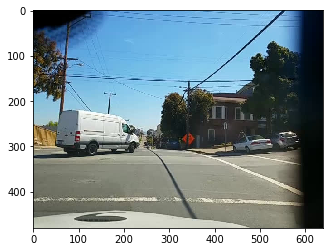

speed: 0.0
shape: (480, 640, 3)


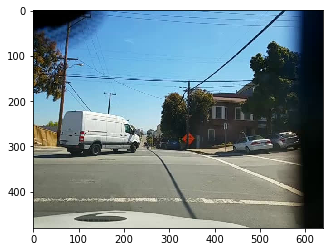

speed: 0.0
shape: (480, 640, 3)


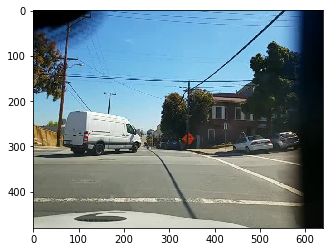

speed: 0.0
shape: (480, 640, 3)


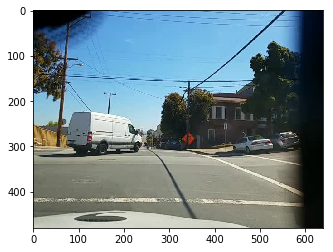

speed: 0.0
shape: (480, 640, 3)


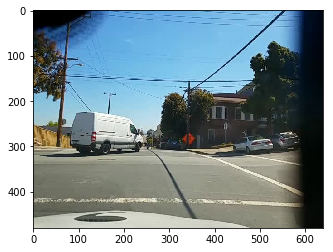

speed: 0.0
shape: (480, 640, 3)


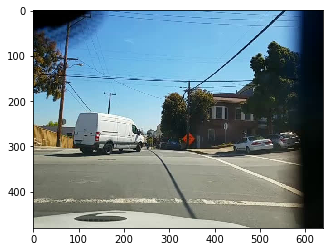

In [38]:
for i in range(50):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

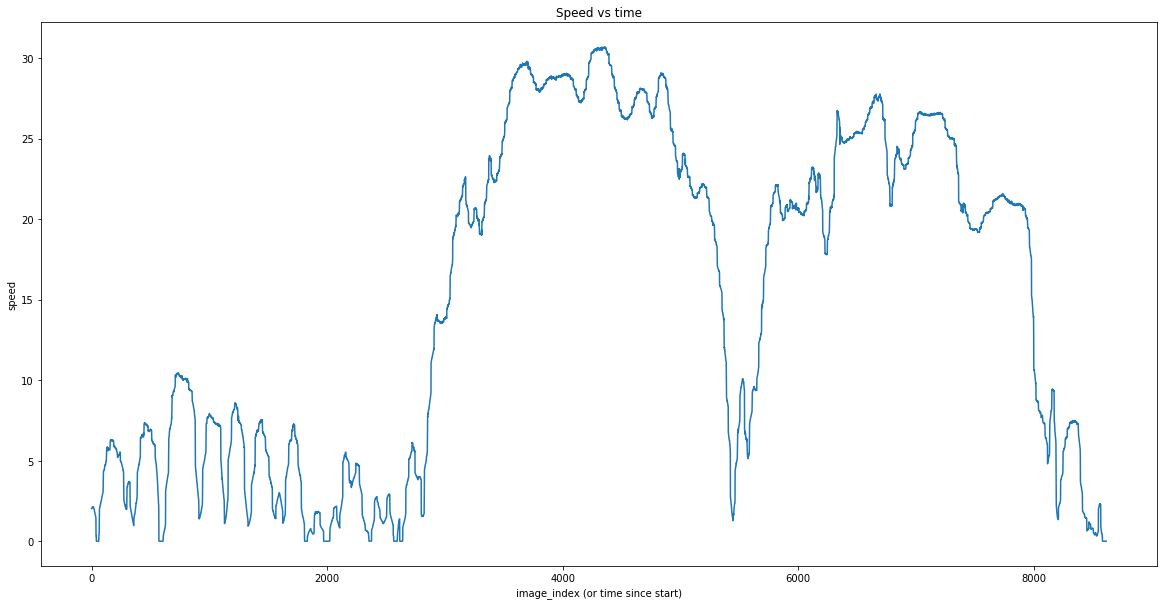

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_meta['speed'])
plt.xlabel('image_index (or time since start)')
plt.ylabel('speed')
plt.title('Speed vs time')
plt.show()